In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize

from model_creation import create_random_forest, load_model_params


In [12]:
plt.style.use("default")

In [13]:
TARGET_COL_NAME = "Expert Diagnose"

dataset_train = pd.read_csv("dataset/train.csv")
dataset_test = pd.read_csv("dataset/test.csv")

X_train, y_train = dataset_train.drop(columns=[TARGET_COL_NAME, "Patient Number"], axis=1), dataset_train[TARGET_COL_NAME]
X_test, y_test = dataset_test.drop(columns=[TARGET_COL_NAME, "Patient Number"], axis=1), dataset_test[TARGET_COL_NAME]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 13), (90,), (30, 13), (30,))

In [14]:
def plot_CM_and_ROC(model: Pipeline):
    axs = plt.subplots(1, 2, figsize=(12, 6))[1].flatten()

    proba = model.predict_proba(X_test)
    pred = model.predict(X_test)
    y_test_bin = label_binarize(y_test, classes=model.classes_)
    roc_auc_score(y_test_bin, proba)
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", ax=axs[0], xticks_rotation="vertical")
    plt.grid(False)
    axs[0].grid(False)

    probs = model.predict_proba(X_test)

    y_bin = label_binarize(y_test, classes=model.classes_)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(y_bin.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    ax = axs[1]
    colors = np.array(['tab:blue', 'tab:red', 'tab:green', "tab:orange"])
    for i in range(y_bin.shape[1]):
        label = f'{model.classes_[i]} (AUC = {roc_auc[i]:.2f})'
        ax.plot(fpr[i], tpr[i], color=colors[i], label=label)

    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Multiclass ROC Curve')
    ax.legend(loc='lower right')
    ax.grid(True)



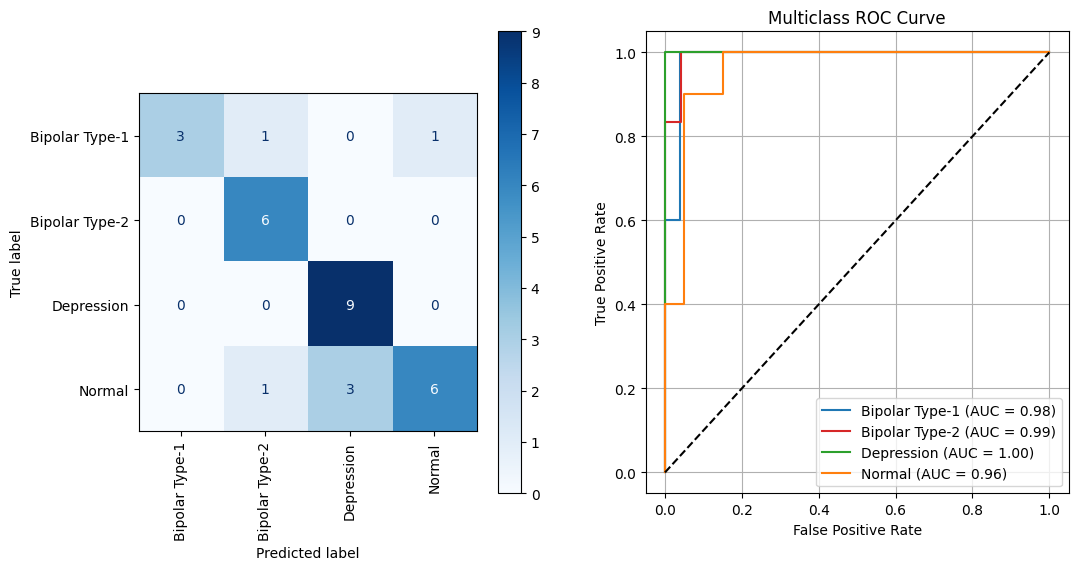

In [15]:
params = load_model_params("random_forest")
random_forest = create_random_forest(params)
random_forest.fit(X_train, y_train)
plot_CM_and_ROC(random_forest)